In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition

df = pd.read_parquet('../data/landmarks.parquet')

df.head()

C:\Users\felip\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,label,video,frame,landmarks
0,happy,../data/35666/_0tf2n3rlJU_0.mp4,30,"[0.09155383634728674, 0.45072657894048856, 0.1..."
1,happy,../data/35666/_0tf2n3rlJU_0.mp4,31,"[0.04696611706300864, 0.40927616297764674, 0.1..."
2,happy,../data/35666/_0tf2n3rlJU_0.mp4,32,"[0.047119087721749775, 0.41060919300381943, 0...."
3,happy,../data/35666/_0tf2n3rlJU_0.mp4,33,"[0.04064085637869828, 0.4199555159132155, 0.17..."
4,happy,../data/35666/_0tf2n3rlJU_0.mp4,34,"[0.06152560852783227, 0.4306792596948259, 0.17..."


In [2]:
y = df["label"]
X = df["landmarks"]
X = np.array(X.tolist())

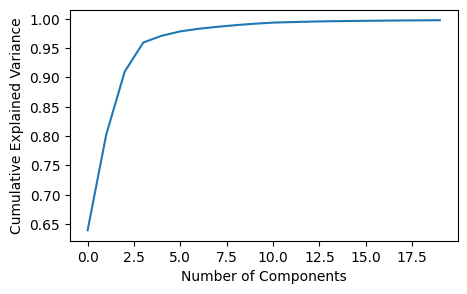

Top Cumulative Explained Variance:  0.9974848102312088


In [3]:
n_components = 20
pca = decomposition.PCA(n_components=n_components)
pca.fit(X)

plt.figure(figsize=(5, 3))
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_sum)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

print("Top Cumulative Explained Variance: ", cumulative_sum[n_components-1])

In [4]:
principal_components = pca.transform(X)

In [5]:
pc_df = pd.DataFrame(data=principal_components, columns=[f"PC{i+1}" for i in range(n_components)])
pc_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-2.919931,2.624154,0.019189,-1.745901,0.048781,-0.584533,-0.066183,-0.361189,-0.154727,0.148172,-0.022633,-0.056332,-0.064585,0.045895,0.152312,0.281226,-0.010112,0.068105,-0.070667,0.167720
1,-2.425666,1.943809,-0.162745,-0.835240,0.363333,-0.313617,0.029812,-0.323244,-0.080105,0.165745,0.035587,-0.188452,0.043666,-0.017317,0.046475,0.156812,-0.033735,0.133694,-0.067045,0.096506
2,-2.349361,2.070186,-0.114546,-0.894598,0.222630,-0.289489,0.055417,-0.403261,-0.043620,0.193918,0.012229,-0.208188,0.076526,0.010672,0.041231,0.148540,-0.004347,0.134377,-0.059920,0.083128
3,-2.319039,2.211985,-0.107307,-1.027317,0.142543,-0.316502,0.069175,-0.457194,-0.072606,0.186789,0.000038,-0.209320,0.102759,0.033662,0.049343,0.149298,-0.001055,0.103226,-0.079370,0.087087
4,-2.796665,2.635584,0.039614,-0.940008,0.081617,-0.168472,0.180836,-0.499248,-0.077225,0.123918,-0.056776,-0.271494,0.069542,0.028476,0.186310,0.103916,-0.020695,0.113482,-0.058791,0.093259


In [6]:
pc_df["target"] = y.to_list()

In [7]:
pc_df.to_parquet("../data/principal_components_with_labels.parquet", index=False)

In [8]:
import joblib

joblib.dump(pca, '../models/pca_model.pkl')

['../models/pca_model.pkl']